## How to Run the Code
- Install requirements: `pip install -r requirements.txt`
- Run tests: `pytest test_final.py`
- Example usage is provided in this notebook.

## Bibliography
- https://numpy.org/
- https://matplotlib.org/


/tmp/ipykernel_121171/829988091.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Latitude (°)'] = df['Latitude (°)'].fillna(method='ffill')
/tmp/ipykernel_121171/829988091.py:20: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Longitude (°)'] = df['Longitude (°)'].fillna(method='ffill')
/workspaces/CP1-24-final-Forked/Tolani4/Code/final.py:122: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(sine_wave, time, data, p0=[guess_amplitude, guess_frequency, guess_phase, guess_offset])
/tmp/ipykernel_121171/829988091.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Latitude (°)'] = df['Latitude (°)'].fillna(method='ffill')
/tmp/ipykernel_121171/829988091.py:20: FutureWar

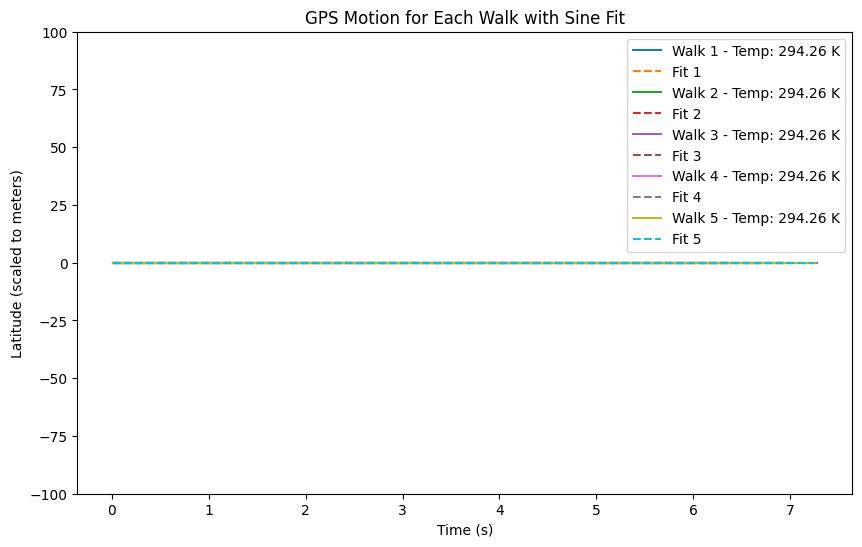

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from Tolani4.Code.final import sine_wave, fit_sine_wave

def plot_gps_motion(csv_files, temperatures):
    plt.figure(figsize=(10, 6))
    for i, file in enumerate(csv_files):
        df = pd.read_csv(file)

        # Standardize column names
        df.columns = df.columns.str.strip()

        if 'Latitude (°)' not in df.columns or 'Longitude (°)' not in df.columns:
            print(f"Skipping {file} - Missing 'Latitude (°)' or 'Longitude (°)'")
            continue

        # Handle missing data
        df['Latitude (°)'] = df['Latitude (°)'].fillna(method='ffill')
        df['Longitude (°)'] = df['Longitude (°)'].fillna(method='ffill')
        df['Time (s)'] = df['Time (s)'].interpolate()

        time = df['Time (s)'].values
        # Convert latitude to meters
        latitude_meters = (df['Latitude (°)'] - df['Latitude (°)'].mean()) * 111320
        longitude_meters = (df['Longitude (°)'] - df['Longitude (°)'].mean()) * 111320 * np.cos(np.radians(df['Latitude (°)'].mean()))

        # Fit the sine wave
        popt = fit_sine_wave(time, longitude_meters)
        fitted_lat = sine_wave(time, *popt)

        # Plot data and fit
        plt.plot(time, longitude_meters, label=f"Walk {i+1} - Temp: {temperatures[i]} K")
        plt.plot(time, fitted_lat, '--', label=f"Fit {i+1}")

    plt.xlabel('Time (s)')
    plt.ylabel('Latitude (scaled to meters)')
    plt.title('GPS Motion for Each Walk with Sine Fit')
    plt.legend()
    plt.ylim(-100, 100)  # Adjust limits as needed
    plt.show()



# File paths and temperatures
csv_files = [
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL001_sinewalk1.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL002_sinwalk2.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL003_sinwalk3.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL004_sinwalk4.csv",
    "/workspaces/CP1-24-final-Forked/Tolani4/Data/LL005_sinwalk5.csv",
]
temperatures = [294.26, 294.26, 294.26, 294.26, 294.26]

# Call the function
plot_gps_motion(csv_files, temperatures)
